# Mini-project 1: Kohonen Networks. (Ilaria Ricchi, Arvin Subramaniam)

Add:
1. Optimise both intra and inter simulatenously
2. Add cross validation + mean field argument?

Fix:
1. Picture of center of masses of clusters.
2. Vertical axis on heat map.
3. Put all plots vs sigma for each rate on same plot, and indicate direction of time.
4. Put all plots for different iterations on same plot? - Include time?

In [225]:
import kohonen as koh
reload(koh)

(array([0, 4, 5, 8], dtype=uint8), 'digits of name')


<module 'kohonen' from 'kohonen.py'>

# Warm-up Run

Initial centers


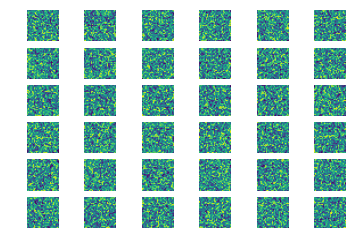

Final centers


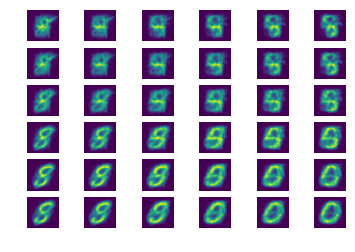

(10, 'length of grad array')


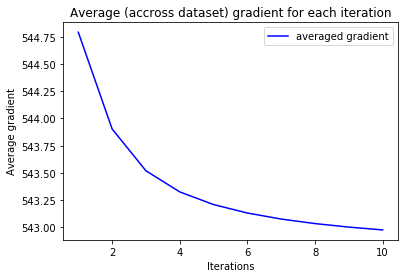

In [71]:
eta = 0.1
width = 6
sigma = 2.0
its = 20000
koh_test, grads = koh.kohonen(eta,width,sigma,its,plot=True)
koh.find_convergence(grads,its)

# 1. For small eta vary number of iterations

To find the number of epochs after which the algorithm converges, we plotted the weight update (averaged over all the datapoints and nodes) as a function of the number of epochs.

(0, 10000)
('maxium iterations is', 10000)
(5, 'length of grad array')


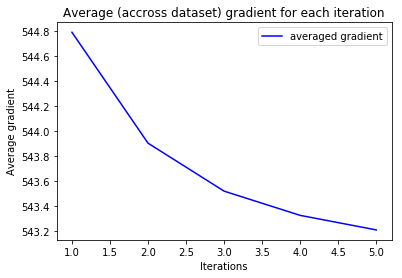

(1, 20000)
('maxium iterations is', 20000)
(10, 'length of grad array')


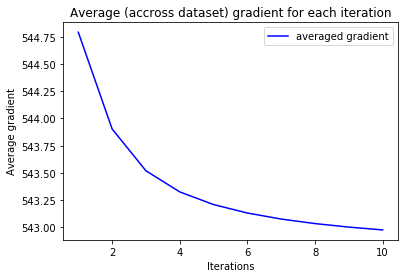

(2, 40000)
('maxium iterations is', 40000)
(20, 'length of grad array')


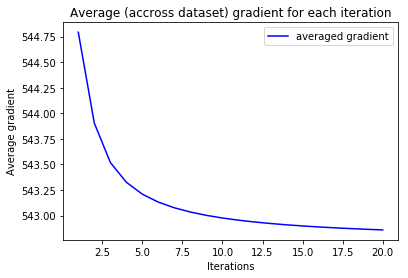

(3, 80000)
('maxium iterations is', 80000)
(40, 'length of grad array')


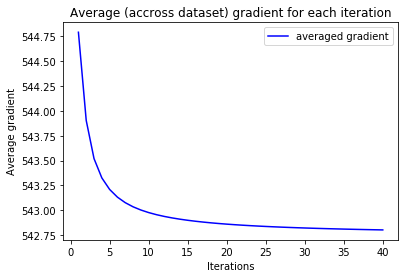

In [62]:
eta = 0.1
width = 6
sigma = 2.0
max_its = [10000,20000,40000,80000]
for i,it in enumerate(max_its):
    print(i,it)
    print("maxium iterations is",it)
    koh_,grads = koh.kohonen(eta,width,sigma,it)
    koh.find_convergence(grads,it)

And so we qualitatively choose the number of epochs to be 20 for the subsequent parts.

# 1.1 Testing the assign_digit function

Here we use one of the final outputs from above to assign digits to the prototypes based on a minimal distance metric.

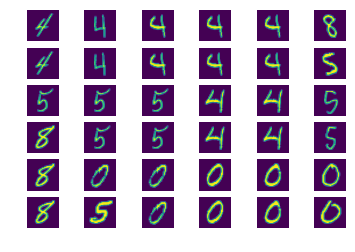

In [72]:
koh.assign_digit(koh_test)

# 2. Vary $\eta$ to look for best convergence

To see whether we can further improve on convergence, we now measure the averaged gradient change against the learning rate $\eta$ to see if this imrpoves convergence time.

('Learnig rate is', 0.01)
(40, 'length of grad array')


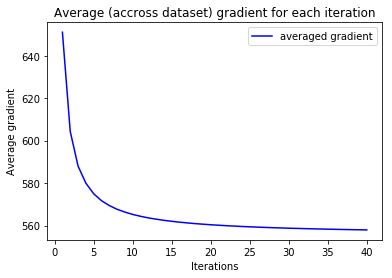

('Learnig rate is', 0.1)
(40, 'length of grad array')


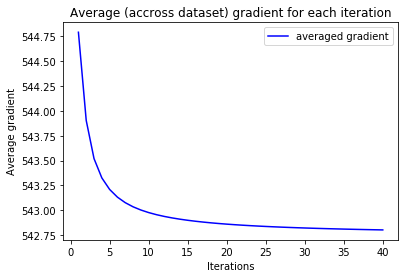

('Learnig rate is', 0.4)
(40, 'length of grad array')


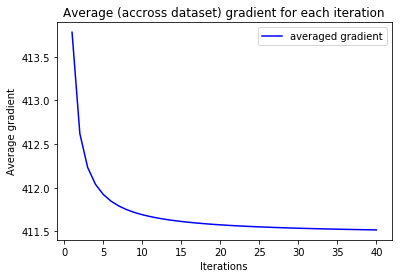

('Learnig rate is', 1.2)
(40, 'length of grad array')


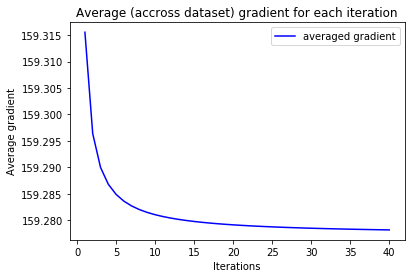

('Learnig rate is', 3.0)
(40, 'length of grad array')


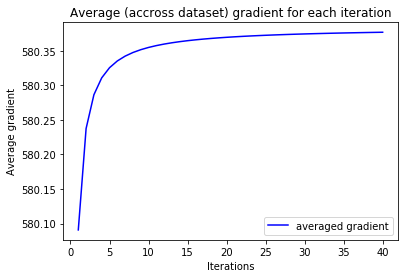

In [63]:
etas = [0.01,0.1,0.4,1.2,3.0]
width = 6
sigma = 2.0
max_it = 20000
for eta in etas:
    print("Learnig rate is",eta)
    koh_,grads = koh.kohonen(eta,width,sigma,it)
    koh.find_convergence(grads,it)

# 3. Vary number of nodes and neighbourhood parameter

Using the inter-cluster loss function defined, an exhaustive grid search is performed to find the best parameters. A heat map is dislayed which shows this.

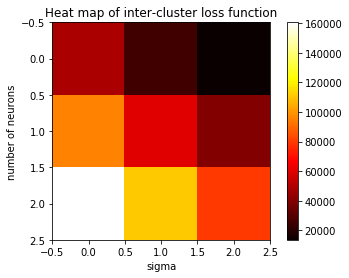

('optimal size and sigma are', 10, 1)


In [73]:
sizes_k = [6,8,10]
sigmas = [1,3,5]
k,s = koh.optimize_params(sizes_k, sigmas, eta = 0.3, tmax=2000)
print("optimal size and sigma are",k,s)

# 4. Comparison with a different kind of digit assignment  - tesselating input space and counting numbers in each cluster

Here, we use a different method of assigning digits to prototypes. First, we tesselate the input space after convergence with a hard clustering based on the minimal distance measure. Then, we count the number of data points in a given cluster and assign the prototype to the modal number.

('Counting matrix is', array([[   4.,   77.,   61.,   22.],
       [   0.,   43.,    5.,    5.],
       [   0.,   87.,   10.,    5.],
       [   0.,   57.,    1.,    5.],
       [   0.,    6.,    1.,    0.],
       [   0.,    2.,    1.,  105.],
       [   3.,   26.,   17.,   31.],
       [   0.,   26.,    2.,    3.],
       [   0.,   45.,    1.,    2.],
       [   0.,   38.,    2.,    1.],
       [   0.,    4.,    0.,    1.],
       [   0.,    0.,    4.,   17.],
       [   5.,   12.,   40.,   49.],
       [   1.,   12.,   12.,   11.],
       [   1.,   26.,    5.,    0.],
       [   0.,   19.,    5.,    0.],
       [   0.,    3.,    3.,    2.],
       [   0.,    0.,   48.,   37.],
       [   1.,    0.,   25.,   62.],
       [   1.,    1.,    8.,   12.],
       [   4.,    3.,   13.,    5.],
       [   1.,    5.,    4.,    0.],
       [   2.,    2.,    6.,    0.],
       [  19.,    0.,   87.,   16.],
       [   0.,    0.,    6.,   70.],
       [   0.,    0.,    3.,    5.],
       [   2., 

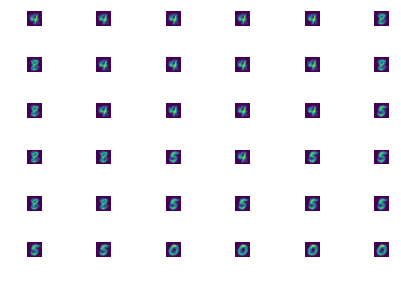

In [187]:
com, assign = koh.assign_counting(koh_test)

# 4.1 Optimizing parameters by minimizing the average intra-cluster separation.

With the input space now tessellated, the average intra-cluster separation then given a loss measure, that is minimized to give the optimal parameters. These are implmented thorugh the functions intra-cluster() and optimize_params_intra

('Counting matrix is', array([[ 119.,    0.,    1.,    0.],
       [ 107.,    0.,   23.,    6.],
       [  50.,    0.,   24.,   13.],
       [   8.,    0.,   34.,    9.],
       [   0.,    0.,   14.,    5.],
       [   0.,    0.,    7.,   51.],
       [  74.,    0.,    0.,    0.],
       [  32.,    1.,    2.,    1.],
       [   7.,    0.,   52.,    2.],
       [   5.,    1.,   66.,   41.],
       [   4.,    0.,    6.,   28.],
       [   0.,    0.,    4.,   48.],
       [  50.,    0.,    0.,    0.],
       [   2.,    3.,    0.,    2.],
       [   1.,    9.,   25.,   56.],
       [   2.,   15.,   11.,   42.],
       [   0.,    0.,    2.,   16.],
       [   0.,    0.,    0.,   12.],
       [  20.,    1.,    2.,    1.],
       [   0.,    0.,    2.,    9.],
       [   0.,    1.,    0.,   30.],
       [   0.,   12.,    0.,    3.],
       [   0.,   23.,    0.,    4.],
       [   0.,    0.,    1.,   16.],
       [  14.,    5.,   35.,   18.],
       [   0.,    0.,   13.,   19.],
       [   2., 

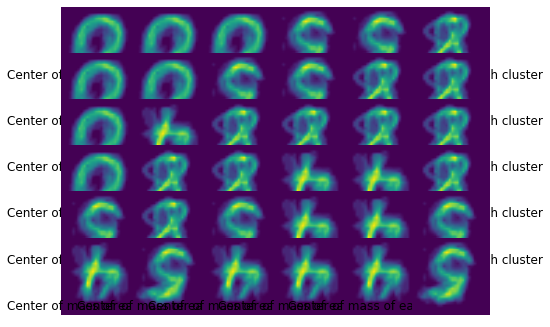

('Counting matrix is', array([[  17.,    0.,   94.,  116.],
       [   8.,    6.,   21.,   73.],
       [   3.,   13.,   36.,   59.],
       [   0.,    5.,   18.,   17.],
       [   0.,    2.,    1.,    3.],
       [   3.,   22.,   70.,   39.],
       [   3.,    3.,   17.,   12.],
       [   2.,    6.,    7.,    3.],
       [   1.,   14.,   15.,    9.],
       [   0.,    8.,    7.,    5.],
       [   0.,    2.,    4.,    0.],
       [   1.,   46.,   29.,   40.],
       [  14.,    3.,   20.,    6.],
       [   6.,   12.,   18.,    4.],
       [   4.,   18.,   21.,   13.],
       [   0.,   13.,    3.,   17.],
       [   0.,    4.,    0.,    1.],
       [   0.,   16.,   13.,   37.],
       [  20.,    5.,    4.,    3.],
       [   7.,    7.,    9.,    1.],
       [   6.,    3.,   24.,   12.],
       [   0.,    7.,    7.,    2.],
       [   0.,    1.,    0.,    3.],
       [   0.,   10.,    6.,    5.],
       [   6.,    0.,    5.,    0.],
       [   0.,    1.,    1.,    1.],
       [   0., 

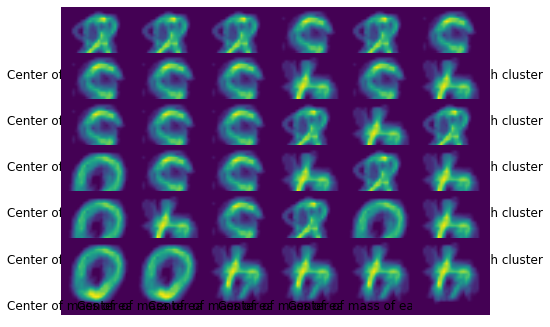

/Users/arvingopal5794/anaconda/envs/bmnn/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/arvingopal5794/anaconda/envs/bmnn/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


('Counting matrix is', array([[   2.,  159.,   25.,   14.],
       [   0.,    5.,    1.,    0.],
       [   1.,   23.,    5.,    0.],
       [   7.,   41.,    8.,    2.],
       [   9.,   40.,   10.,    3.],
       [ 439.,   58.,   36.,   17.],
       [   0.,   13.,    0.,    1.],
       [   0.,    1.,    0.,    0.],
       [   0.,    2.,    2.,    0.],
       [   0.,    2.,    2.,    1.],
       [   0.,    3.,    2.,    1.],
       [   0.,    5.,    4.,    1.],
       [   0.,   11.,    1.,    0.],
       [   0.,    1.,    1.,    0.],
       [   0.,    6.,    0.,    1.],
       [   0.,    6.,    0.,    0.],
       [   3.,    5.,    4.,    0.],
       [   3.,    6.,    6.,    1.],
       [   0.,    7.,    4.,    4.],
       [   0.,    0.,    0.,    0.],
       [   0.,    2.,    2.,    1.],
       [   0.,    0.,    3.,    2.],
       [   1.,    8.,    6.,    2.],
       [   4.,    8.,   14.,    1.],
       [   0.,    5.,    6.,    2.],
       [   0.,    0.,    0.,    0.],
       [   0., 

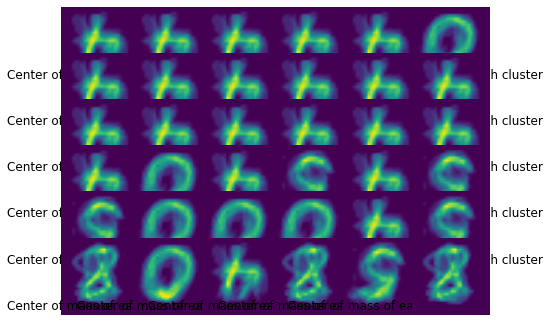

('Counting matrix is', array([[   0.,   23.,    0.,    0.],
       [   0.,   46.,    0.,    2.],
       [   0.,   90.,    0.,    0.],
       [   0.,   19.,    1.,    0.],
       [   2.,    0.,    0.,   17.],
       [   3.,    0.,    0.,    4.],
       [   7.,    0.,    6.,   18.],
       [   0.,    0.,    1.,  108.],
       [   0.,    8.,    2.,    2.],
       [   0.,    0.,    0.,    1.],
       [   0.,    9.,    2.,    5.],
       [   0.,   10.,   17.,    5.],
       [   1.,    0.,   28.,    5.],
       [   0.,    0.,   32.,    0.],
       [   0.,    0.,   19.,    1.],
       [   0.,    0.,    3.,   22.],
       [   0.,    0.,    0.,   16.],
       [   0.,    0.,    0.,    6.],
       [   0.,    0.,    0.,    6.],
       [   0.,    8.,   18.,    1.],
       [   0.,    7.,    4.,    2.],
       [   3.,    4.,   29.,    6.],
       [   0.,    0.,    7.,    5.],
       [   0.,    0.,    0.,    6.],
       [   4.,    0.,   43.,   19.],
       [   0.,    0.,    3.,   19.],
       [   0., 

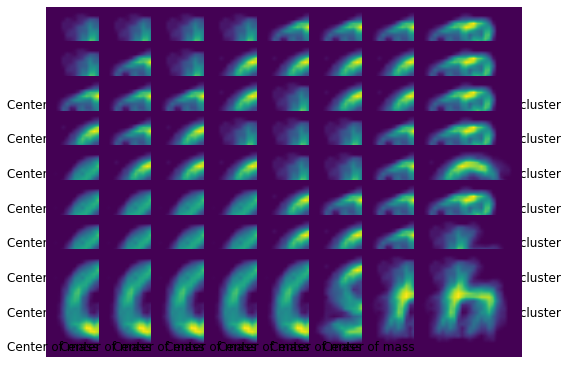

('Counting matrix is', array([[  2.,   8.,  16.,  81.],
       [  0.,   0.,   0.,  22.],
       [  0.,   0.,   0.,   7.],
       [  0.,   0.,   7.,   7.],
       [  0.,   0.,  14.,  16.],
       [  1.,   0.,  14.,  24.],
       [  0.,   2.,   7.,  12.],
       [  4.,   8.,  76.,  90.],
       [  2.,  19.,  38.,  40.],
       [  1.,   0.,   4.,   8.],
       [  0.,   0.,   6.,   3.],
       [  0.,   2.,   6.,   2.],
       [  0.,   3.,   5.,   2.],
       [  0.,   2.,   0.,   3.],
       [  0.,   1.,   1.,   0.],
       [  0.,   0.,   4.,  24.],
       [  9.,  28.,  29.,  15.],
       [  0.,   1.,   3.,   2.],
       [  0.,   0.,  25.,   2.],
       [  0.,   2.,  19.,   6.],
       [  0.,   6.,  10.,   3.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   1.],
       [  0.,   0.,   1.,  24.],
       [ 46.,   7.,  22.,  10.],
       [  3.,   2.,   2.,   2.],
       [  0.,   1.,   5.,   0.],
       [  1.,   7.,  13.,   4.],
       [  0.,   9.,  13.,   6.],
       [  0.,   4., 

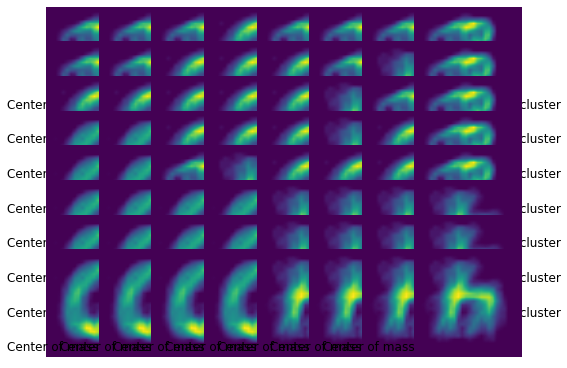

('Counting matrix is', array([[   0.,  133.,   10.,    2.],
       [   0.,   10.,    3.,    1.],
       [   0.,   19.,    5.,    5.],
       [   0.,   18.,    3.,    5.],
       [   0.,    5.,   11.,    4.],
       [   0.,    5.,    7.,   11.],
       [   1.,    0.,    5.,   12.],
       [   0.,    1.,   25.,   79.],
       [   0.,    3.,    3.,    0.],
       [   0.,    1.,    0.,    0.],
       [   0.,    3.,    1.,    0.],
       [   0.,    0.,    1.,    0.],
       [   0.,    1.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   3.,   16.,    2.,    0.],
       [   0.,    3.,    0.,    1.],
       [   0.,    3.,    2.,    1.],
       [   0.,    9.,    2.,    1.],
       [   0.,    2.,    2.,    0.],
       [   0.,    1.,    1.,    1.],
       [   0.,    1.,    1.,    0.],
       [   0.,    0.,    1.,    4.],
       [   7.,   34.,    2.,    0.],
       [   1.,    3.,    4.,    1.],
       [   0., 

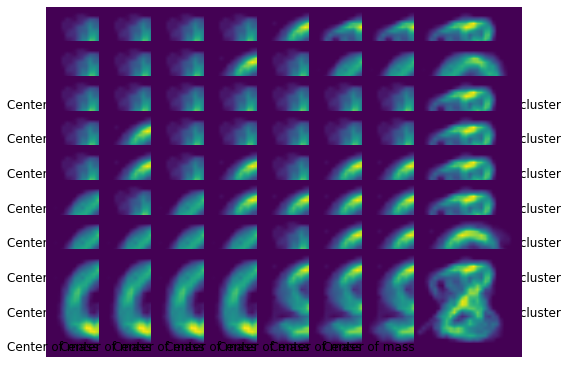

('Counting matrix is', array([[  0.,   0.,   5.,   1.],
       [  0.,   0.,  14.,   2.],
       [  0.,   0.,  22.,   0.],
       [  0.,   0.,  34.,   3.],
       [  1.,   0.,   8.,   0.],
       [ 22.,   0.,  18.,   0.],
       [ 43.,   0.,   0.,   0.],
       [  8.,   0.,   0.,   0.],
       [ 20.,   0.,   0.,   0.],
       [ 52.,   0.,   0.,   0.],
       [  0.,  12.,   7.,   6.],
       [  1.,   9.,   5.,   1.],
       [  0.,   2.,  11.,   1.],
       [  0.,   2.,   2.,   8.],
       [  0.,   0.,   2.,   1.],
       [ 11.,   0.,  19.,   0.],
       [ 38.,   0.,   2.,   1.],
       [ 26.,   0.,   0.,   0.],
       [ 18.,   0.,   0.,   0.],
       [  6.,   0.,   0.,   0.],
       [  0.,  87.,   0.,   1.],
       [  0.,  11.,   1.,   0.],
       [  0.,   3.,   0.,   0.],
       [  0.,   7.,   0.,   0.],
       [  4.,   2.,   4.,   5.],
       [ 19.,   0.,   8.,   1.],
       [ 22.,   0.,   8.,   0.],
       [ 38.,   0.,   1.,   0.],
       [ 31.,   0.,   2.,   0.],
       [ 12.,   0., 

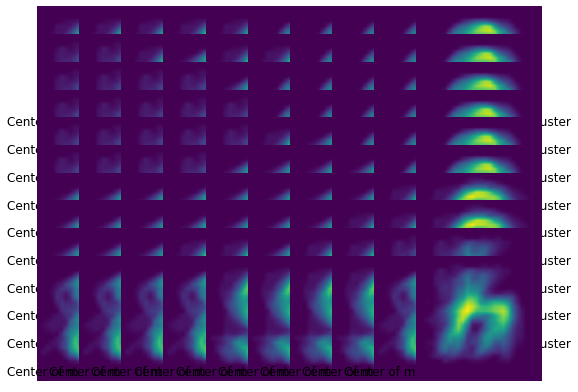

('Counting matrix is', array([[  0.,   0.,  36.,  71.],
       [  0.,   0.,   2.,  10.],
       [  0.,   0.,   0.,   4.],
       [  0.,   0.,   0.,  16.],
       [  0.,   0.,   1.,  18.],
       [  1.,   0.,   6.,   9.],
       [  5.,   0.,   1.,   1.],
       [  9.,   0.,   0.,   0.],
       [ 22.,   0.,   0.,   0.],
       [ 58.,   0.,   0.,   0.],
       [  2.,   1.,  23.,  38.],
       [  0.,   0.,   0.,   2.],
       [  0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   1.],
       [  0.,   1.,   1.,   5.],
       [  1.,   0.,   8.,   4.],
       [  2.,   1.,   4.,   2.],
       [  3.,   0.,   0.,   0.],
       [  4.,   0.,   0.,   0.],
       [ 14.,   0.,   0.,   0.],
       [  3.,   1.,   8.,  48.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   5.],
       [  0.,   0.,   3.,   5.],
       [  0.,   4.,   6.,   9.],
       [  1.,   6.,  31.,   6.],
       [  9.,   1.,   5.,   1.],
       [ 10.,   0.,   1.,   0.],
       [  6.,   0.,   2.,   0.],
       [ 59.,   0., 

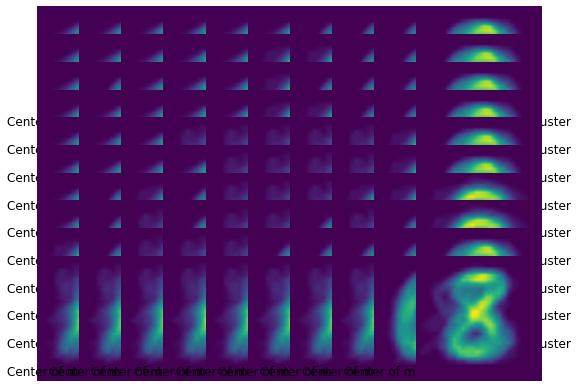

('Counting matrix is', array([[ 147.,    0.,    0.,    0.],
       [  13.,    2.,    0.,    1.],
       [  18.,    1.,    0.,    0.],
       [  26.,   13.,    0.,    0.],
       [  13.,   45.,    3.,    3.],
       [   8.,   59.,    6.,    2.],
       [   1.,   41.,    4.,    3.],
       [   0.,   24.,    0.,    0.],
       [   0.,   19.,    0.,    0.],
       [   0.,   56.,   23.,    3.],
       [  73.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   2.,    1.,    0.,    0.],
       [   0.,    5.,    0.,    1.],
       [   0.,    4.,    2.,    1.],
       [   0.,    3.,    3.,    0.],
       [   0.,    8.,    0.,    1.],
       [   0.,    1.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   0.,   11.,    0.,    1.],
       [  43.,    0.,    0.,    0.],
       [   2.,    1.,    0.,    0.],
       [   3.,    0.,    0.,    0.],
       [   3.,    4.,    1.,    1.],
       [   6.,    4.,    2.,    1.],
       [   2.,   12.,    6.,    1.],
       [   0., 

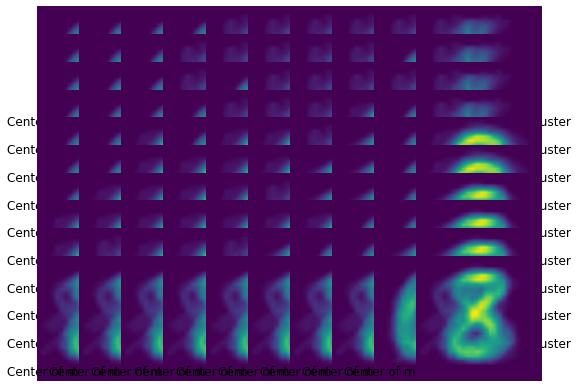

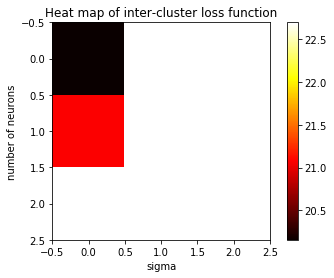

('optimal size and sigma are', 6, 3)


In [226]:
sizes_k = [6,8,10]
sigmas = [1,3,5]
k,s = koh.optimize_params_intra(sizes_k, sigmas, eta = 0.3, tmax=2000)
print("optimal size and sigma are",k,s)

# 5. Simultaneuosly maximizing inter-cluster distance and minimizing inta-cluster distance.

Since the previous two procedures gave distinct optimal parameters, we now attempt a joint optimization. This is naively done by maximzing $\mathcal{L_{inter}} - \mathcal{L_{intra}}$.

('Counting matrix is', array([[ 119.,    0.,    1.,    0.],
       [ 107.,    0.,   23.,    6.],
       [  50.,    0.,   24.,   13.],
       [   8.,    0.,   34.,    9.],
       [   0.,    0.,   14.,    5.],
       [   0.,    0.,    7.,   51.],
       [  74.,    0.,    0.,    0.],
       [  32.,    1.,    2.,    1.],
       [   7.,    0.,   52.,    2.],
       [   5.,    1.,   66.,   41.],
       [   4.,    0.,    6.,   28.],
       [   0.,    0.,    4.,   48.],
       [  50.,    0.,    0.,    0.],
       [   2.,    3.,    0.,    2.],
       [   1.,    9.,   25.,   56.],
       [   2.,   15.,   11.,   42.],
       [   0.,    0.,    2.,   16.],
       [   0.,    0.,    0.,   12.],
       [  20.,    1.,    2.,    1.],
       [   0.,    0.,    2.,    9.],
       [   0.,    1.,    0.,   30.],
       [   0.,   12.,    0.,    3.],
       [   0.,   23.,    0.,    4.],
       [   0.,    0.,    1.,   16.],
       [  14.,    5.,   35.,   18.],
       [   0.,    0.,   13.,   19.],
       [   2., 

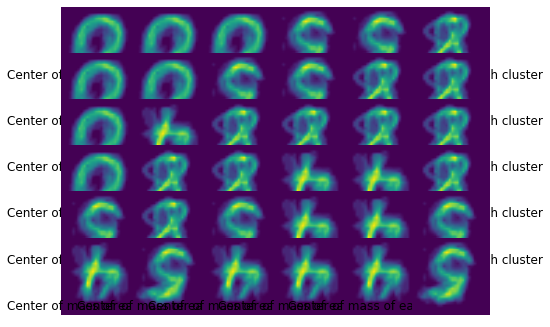

('Counting matrix is', array([[  17.,    0.,   94.,  116.],
       [   8.,    6.,   21.,   73.],
       [   3.,   13.,   36.,   59.],
       [   0.,    5.,   18.,   17.],
       [   0.,    2.,    1.,    3.],
       [   3.,   22.,   70.,   39.],
       [   3.,    3.,   17.,   12.],
       [   2.,    6.,    7.,    3.],
       [   1.,   14.,   15.,    9.],
       [   0.,    8.,    7.,    5.],
       [   0.,    2.,    4.,    0.],
       [   1.,   46.,   29.,   40.],
       [  14.,    3.,   20.,    6.],
       [   6.,   12.,   18.,    4.],
       [   4.,   18.,   21.,   13.],
       [   0.,   13.,    3.,   17.],
       [   0.,    4.,    0.,    1.],
       [   0.,   16.,   13.,   37.],
       [  20.,    5.,    4.,    3.],
       [   7.,    7.,    9.,    1.],
       [   6.,    3.,   24.,   12.],
       [   0.,    7.,    7.,    2.],
       [   0.,    1.,    0.,    3.],
       [   0.,   10.,    6.,    5.],
       [   6.,    0.,    5.,    0.],
       [   0.,    1.,    1.,    1.],
       [   0., 

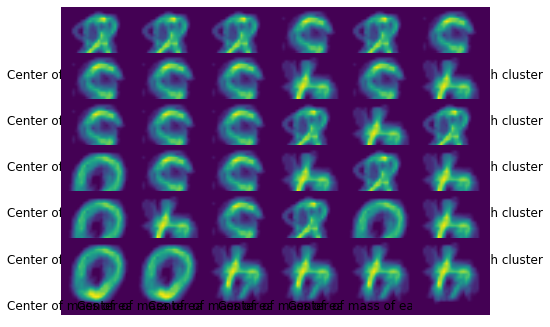

('Counting matrix is', array([[   2.,  159.,   25.,   14.],
       [   0.,    5.,    1.,    0.],
       [   1.,   23.,    5.,    0.],
       [   7.,   41.,    8.,    2.],
       [   9.,   40.,   10.,    3.],
       [ 439.,   58.,   36.,   17.],
       [   0.,   13.,    0.,    1.],
       [   0.,    1.,    0.,    0.],
       [   0.,    2.,    2.,    0.],
       [   0.,    2.,    2.,    1.],
       [   0.,    3.,    2.,    1.],
       [   0.,    5.,    4.,    1.],
       [   0.,   11.,    1.,    0.],
       [   0.,    1.,    1.,    0.],
       [   0.,    6.,    0.,    1.],
       [   0.,    6.,    0.,    0.],
       [   3.,    5.,    4.,    0.],
       [   3.,    6.,    6.,    1.],
       [   0.,    7.,    4.,    4.],
       [   0.,    0.,    0.,    0.],
       [   0.,    2.,    2.,    1.],
       [   0.,    0.,    3.,    2.],
       [   1.,    8.,    6.,    2.],
       [   4.,    8.,   14.,    1.],
       [   0.,    5.,    6.,    2.],
       [   0.,    0.,    0.,    0.],
       [   0., 

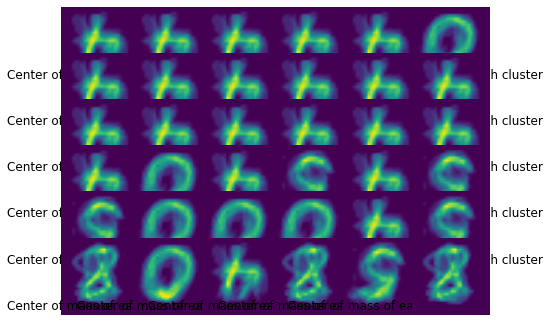

('Counting matrix is', array([[   0.,   23.,    0.,    0.],
       [   0.,   46.,    0.,    2.],
       [   0.,   90.,    0.,    0.],
       [   0.,   19.,    1.,    0.],
       [   2.,    0.,    0.,   17.],
       [   3.,    0.,    0.,    4.],
       [   7.,    0.,    6.,   18.],
       [   0.,    0.,    1.,  108.],
       [   0.,    8.,    2.,    2.],
       [   0.,    0.,    0.,    1.],
       [   0.,    9.,    2.,    5.],
       [   0.,   10.,   17.,    5.],
       [   1.,    0.,   28.,    5.],
       [   0.,    0.,   32.,    0.],
       [   0.,    0.,   19.,    1.],
       [   0.,    0.,    3.,   22.],
       [   0.,    0.,    0.,   16.],
       [   0.,    0.,    0.,    6.],
       [   0.,    0.,    0.,    6.],
       [   0.,    8.,   18.,    1.],
       [   0.,    7.,    4.,    2.],
       [   3.,    4.,   29.,    6.],
       [   0.,    0.,    7.,    5.],
       [   0.,    0.,    0.,    6.],
       [   4.,    0.,   43.,   19.],
       [   0.,    0.,    3.,   19.],
       [   0., 

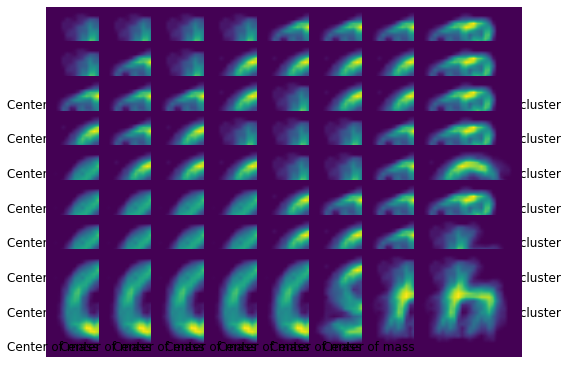

('Counting matrix is', array([[  2.,   8.,  16.,  81.],
       [  0.,   0.,   0.,  22.],
       [  0.,   0.,   0.,   7.],
       [  0.,   0.,   7.,   7.],
       [  0.,   0.,  14.,  16.],
       [  1.,   0.,  14.,  24.],
       [  0.,   2.,   7.,  12.],
       [  4.,   8.,  76.,  90.],
       [  2.,  19.,  38.,  40.],
       [  1.,   0.,   4.,   8.],
       [  0.,   0.,   6.,   3.],
       [  0.,   2.,   6.,   2.],
       [  0.,   3.,   5.,   2.],
       [  0.,   2.,   0.,   3.],
       [  0.,   1.,   1.,   0.],
       [  0.,   0.,   4.,  24.],
       [  9.,  28.,  29.,  15.],
       [  0.,   1.,   3.,   2.],
       [  0.,   0.,  25.,   2.],
       [  0.,   2.,  19.,   6.],
       [  0.,   6.,  10.,   3.],
       [  0.,   1.,   0.,   0.],
       [  0.,   0.,   0.,   1.],
       [  0.,   0.,   1.,  24.],
       [ 46.,   7.,  22.,  10.],
       [  3.,   2.,   2.,   2.],
       [  0.,   1.,   5.,   0.],
       [  1.,   7.,  13.,   4.],
       [  0.,   9.,  13.,   6.],
       [  0.,   4., 

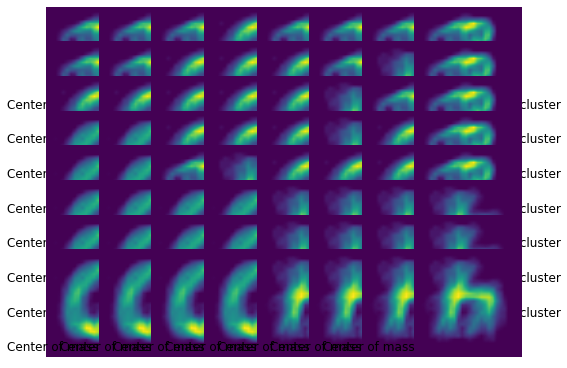

('Counting matrix is', array([[   0.,  133.,   10.,    2.],
       [   0.,   10.,    3.,    1.],
       [   0.,   19.,    5.,    5.],
       [   0.,   18.,    3.,    5.],
       [   0.,    5.,   11.,    4.],
       [   0.,    5.,    7.,   11.],
       [   1.,    0.,    5.,   12.],
       [   0.,    1.,   25.,   79.],
       [   0.,    3.,    3.,    0.],
       [   0.,    1.,    0.,    0.],
       [   0.,    3.,    1.,    0.],
       [   0.,    0.,    1.,    0.],
       [   0.,    1.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   3.,   16.,    2.,    0.],
       [   0.,    3.,    0.,    1.],
       [   0.,    3.,    2.,    1.],
       [   0.,    9.,    2.,    1.],
       [   0.,    2.,    2.,    0.],
       [   0.,    1.,    1.,    1.],
       [   0.,    1.,    1.,    0.],
       [   0.,    0.,    1.,    4.],
       [   7.,   34.,    2.,    0.],
       [   1.,    3.,    4.,    1.],
       [   0., 

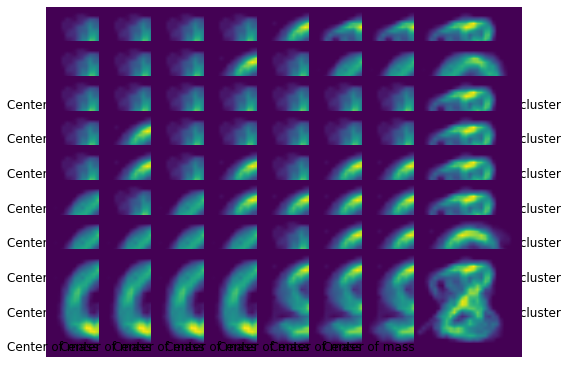

('Counting matrix is', array([[  0.,   0.,   5.,   1.],
       [  0.,   0.,  14.,   2.],
       [  0.,   0.,  22.,   0.],
       [  0.,   0.,  34.,   3.],
       [  1.,   0.,   8.,   0.],
       [ 22.,   0.,  18.,   0.],
       [ 43.,   0.,   0.,   0.],
       [  8.,   0.,   0.,   0.],
       [ 20.,   0.,   0.,   0.],
       [ 52.,   0.,   0.,   0.],
       [  0.,  12.,   7.,   6.],
       [  1.,   9.,   5.,   1.],
       [  0.,   2.,  11.,   1.],
       [  0.,   2.,   2.,   8.],
       [  0.,   0.,   2.,   1.],
       [ 11.,   0.,  19.,   0.],
       [ 38.,   0.,   2.,   1.],
       [ 26.,   0.,   0.,   0.],
       [ 18.,   0.,   0.,   0.],
       [  6.,   0.,   0.,   0.],
       [  0.,  87.,   0.,   1.],
       [  0.,  11.,   1.,   0.],
       [  0.,   3.,   0.,   0.],
       [  0.,   7.,   0.,   0.],
       [  4.,   2.,   4.,   5.],
       [ 19.,   0.,   8.,   1.],
       [ 22.,   0.,   8.,   0.],
       [ 38.,   0.,   1.,   0.],
       [ 31.,   0.,   2.,   0.],
       [ 12.,   0., 

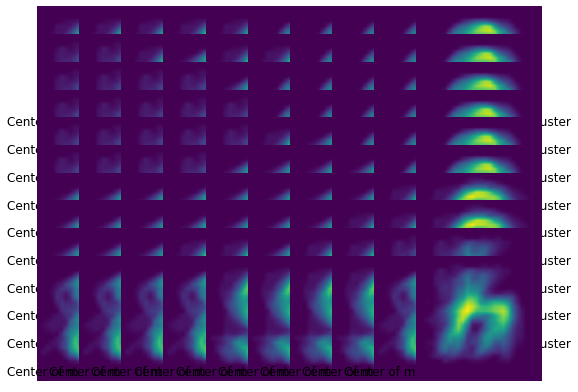

('Counting matrix is', array([[  0.,   0.,  36.,  71.],
       [  0.,   0.,   2.,  10.],
       [  0.,   0.,   0.,   4.],
       [  0.,   0.,   0.,  16.],
       [  0.,   0.,   1.,  18.],
       [  1.,   0.,   6.,   9.],
       [  5.,   0.,   1.,   1.],
       [  9.,   0.,   0.,   0.],
       [ 22.,   0.,   0.,   0.],
       [ 58.,   0.,   0.,   0.],
       [  2.,   1.,  23.,  38.],
       [  0.,   0.,   0.,   2.],
       [  0.,   0.,   0.,   1.],
       [  0.,   0.,   0.,   1.],
       [  0.,   1.,   1.,   5.],
       [  1.,   0.,   8.,   4.],
       [  2.,   1.,   4.,   2.],
       [  3.,   0.,   0.,   0.],
       [  4.,   0.,   0.,   0.],
       [ 14.,   0.,   0.,   0.],
       [  3.,   1.,   8.,  48.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   1.,   5.],
       [  0.,   0.,   3.,   5.],
       [  0.,   4.,   6.,   9.],
       [  1.,   6.,  31.,   6.],
       [  9.,   1.,   5.,   1.],
       [ 10.,   0.,   1.,   0.],
       [  6.,   0.,   2.,   0.],
       [ 59.,   0., 

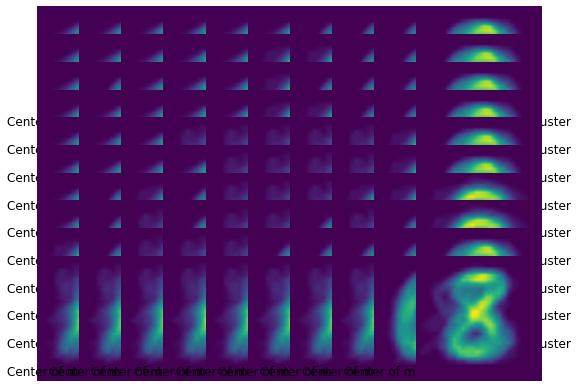

('Counting matrix is', array([[ 147.,    0.,    0.,    0.],
       [  13.,    2.,    0.,    1.],
       [  18.,    1.,    0.,    0.],
       [  26.,   13.,    0.,    0.],
       [  13.,   45.,    3.,    3.],
       [   8.,   59.,    6.,    2.],
       [   1.,   41.,    4.,    3.],
       [   0.,   24.,    0.,    0.],
       [   0.,   19.,    0.,    0.],
       [   0.,   56.,   23.,    3.],
       [  73.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   2.,    1.,    0.,    0.],
       [   0.,    5.,    0.,    1.],
       [   0.,    4.,    2.,    1.],
       [   0.,    3.,    3.,    0.],
       [   0.,    8.,    0.,    1.],
       [   0.,    1.,    0.,    0.],
       [   0.,    0.,    0.,    0.],
       [   0.,   11.,    0.,    1.],
       [  43.,    0.,    0.,    0.],
       [   2.,    1.,    0.,    0.],
       [   3.,    0.,    0.,    0.],
       [   3.,    4.,    1.,    1.],
       [   6.,    4.,    2.,    1.],
       [   2.,   12.,    6.,    1.],
       [   0., 

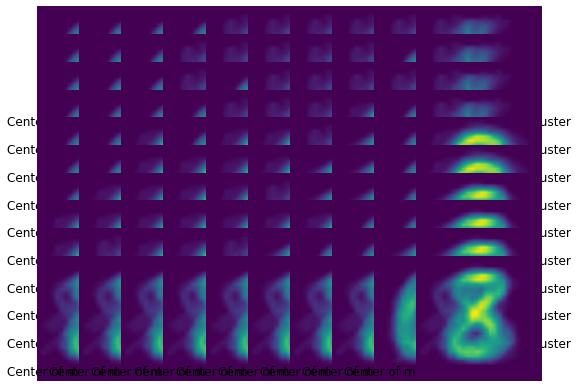

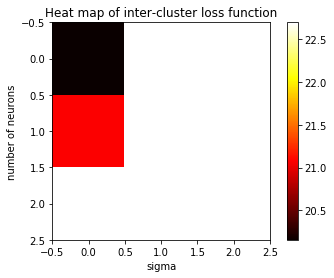

('optimal size and sigma are', 6, 3)


In [227]:
sizes_k = [6,8,10]
sigmas = [1,3,5]
k,s = koh.optimize_params_intra(sizes_k, sigmas, eta = 0.3, tmax=2000)
print("optimal size and sigma are",k,s)

# 6. Varying sigma with the number of iterations.

Here, we run the kohonen_sigma() function. This takes in different rates of change of sigma for the five epochs, starting from a high value and ending at $\sigma = 1$ for the final epoch. The function then plots the inter-cluster loss against $\sigma$ for each rate, and the $\sigma-$averaged against the rates. 

Eg: A rate of 0.5 means that within tmax/dy number of epochs (this is typically 20000/2000 = 10), with $\sigma(epoch=10)$ fixed to 1, it follows that $\sigma(epoch=1) = 5$, with the gradient in between tose two values equal to 0.5. The other $\sigma$s then follow from a liner interpolation.

('Rate is', 0.2)


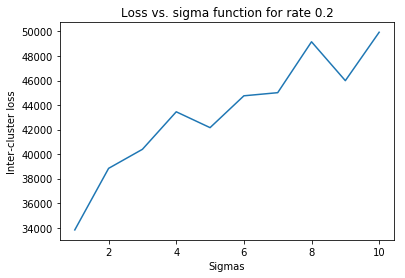

('Rate is', 0.5)


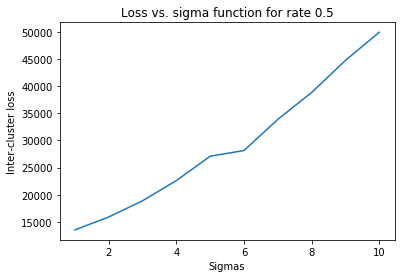

('Rate is', 1.0)


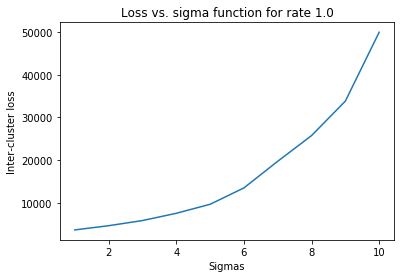

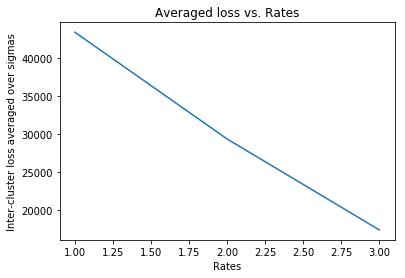

kohonen.py:268: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plb.hold()


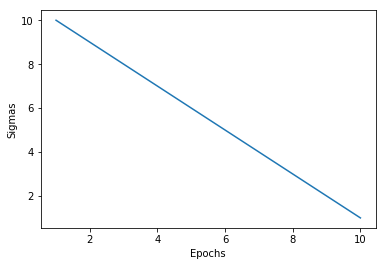

In [77]:
rates = [0.2,0.5,1.0]
koh.kohonen_sigma(rates)

In [ ]:
import numpy as np
x = np.matrix(np.arange(12).reshape((3,4)))
print(x)
i,j = np.unravel_index(x.argmax(),x.shape)
print(i,j)